In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Optimal Stopping Problem - [Secretary Problem](https://en.wikipedia.org/wiki/Secretary_problem)

- An administrator who wants to hire the best secretary out of n rankable applicants.
    + The applicants are interviewed one by one
    + Decision (hire/reject) must be made immediately after each interview.
    + Once rejected, an applicant cannot be recalled

- During the interview, the administrator can rank the applicants among all applicants interviewed so far, but is unaware of the quality of yet unseen applicants
- Optimal Stopping - Find the a strategy to hire the most optimal candidate(maximize the probability of selecting the best applicant)

## Solution
#### Observations
- Trade-off between sampling and exploiting
    - If the sample size is small -> Not is enough info
    - If the sample size is large -> Lot of info but waste many potential candidates

```
                  Sampling        Exploiting
    Candidates = x x x x x x o o o o o o o o o o o o o
```

#### Strategy
- n candidates
    + Sampling: sample size = r
        + Interview (r-1) first candidates and reject them all
        + Suppose X is the best candidate in (r-1)
    + Exploiting
        + Interview the rest if found a candidate i better than X -> hire
        + If no candidate better than X -> dont hire -> X is the global optimal candidate
- Find r to maximize the chance of hiring the best candidate
    
$$P(r)=\sum_{i=1}^{n}P(applicant\ i\ is\ selected \cap applicant\ i\ is\ the\ best)$$
$$=\sum_{i=1}^{n}P(applicant\ i\ is\ selected\ |\ applicant\ i\ is\ the\ best)*P(applicant\ i\ is\ the\ best)$$
$$=\Bigg[\sum_{i=1}^{r-1}0+\sum_{i=r}^{n}P(the\ best\ of\ the\ first\ i-1\ applicants\ is\ in\ the\ first\ r-1\ applicants\ |\ applicant\ i\ is\ the\ best)\Bigg]*\frac{1}{n}$$
$$=\Bigg[\sum_{i=1}^{n}\frac{r-1}{i-1}\Bigg]*\frac{1}{n}$$
$$=\frac{r-1}{n}\sum_{i=r}^{n}\frac{1}{i-1}$$

- If n is small the optimal value of r calculated as above

|   n  |  2  |  3  |   4   |   5   | 6     | 7     | 8     | 9     |
|:----:|:---:|:---:|:-----:|:-----:|-------|-------|-------|-------|
|   r  |  1  |  2  |   2   |   3   | 3     | 3     | 4     | 4     |
| P(r) | 0.5 | 0.5 | 0.458 | 0.433 | 0.428 | 0.414 | 0.410 | 0.406 |

- If n -> inf
$$P(x)=x\int_x^1\frac{1}{t}dt=-xln(x)$$

- P(x) -> 1/e ~ 0.368
- Optimal sampling size 

```
r = n/e
```

In [2]:
# 1/e law of Optimal Strategy
def find_secrectary(candidates):
    '''
        Input: A list of candidates
        Output:
            sample_size: n/e ~ 36.8% candidates
            idx_sample: index of the best candidate in sample set
            idx_hired: index of the optimal hiring candidate (-1 if cant hire)
    '''
    N = len(candidates)
    sample_size = (N/np.exp(1)).round().astype(int)
    
    # Find the best candidate in sample set
    idx_sample = 0;
    for i in range(sample_size):
        if candidates[i] > candidates[idx_sample]:
            idx_sample = i
    
    # Find the optimal candidate
    idx_optimal = 0;
    for i in range(sample_size, N):
        if candidates[i] >= candidates[idx_sample]:
            return sample_size, idx_sample, i
    
    # Cant choose the optimal candidates
    return sample_size, idx_sample, -1

## Test

In [3]:
def generate_test_set(n, a=30, b=100):
    '''Generate n candidates
        with normal distribution scores in range [a,b]
    '''
    # Generate normal distribution test
    mu, sigma = a+(b-a)/2, (b-a)/8
    candidates = np.random.normal(mu, sigma, n).round().astype(int)
    
    # Shuffle the dataset
    np.random.shuffle(candidates)
    
    # Plot histogram
    count, bins, ignored = plt.hist(candidates, 100, density=True)
    plt.plot(
        bins,
        1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
    plt.show();

    return candidates

In [4]:
def test(n, isPrintList=True):
    # Hire the optimal secretary
    candidates = generate_test_set(n, 40, 100)
    sample_size, idx_sample, idx_hired = find_secrectary(candidates)
    
    # Find the global optimal
    idx_globals = []
    global_optimal = candidates.max()
    for i in range(n):
        if candidates[i] == global_optimal:
            idx_globals.append(i)
    
    # Print the list of candidate
    if isPrintList:
        print("List of candidates:")
        print('\t', end='')
        for i,candidate in enumerate(candidates):
            print("[" + str(i) + "]" + str(candidate),end=' ')
        print('')

    # Sampling
    print("Sample candidates from [0] to [" + str(sample_size-1) + "]")
    print("Best Sampling rejected candidate: [" + str(idx_sample) + "]" + str(candidates[idx_sample]))
    
    # Make hiring Decision
    if idx_hired == -1:
         print("Cant hire")
    else:
        print("Hired candidate: [" + str(idx_hired) + "]" + str(candidates[idx_hired]))
    
    # Global Optimal candidates
    print("Global optimal candidates:",end=' ')
    for idx in idx_globals:
        print("[" + str(idx) + "]" + str(candidates[idx]),end=' ')

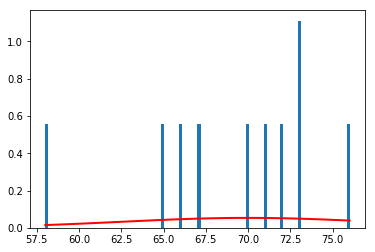

List of candidates:
	[0]76 [1]70 [2]73 [3]65 [4]58 [5]71 [6]66 [7]67 [8]72 [9]73 
Sample candidates from [0] to [3]
Best Sampling rejected candidate: [0]76
Cant hire
Global optimal candidates: [0]76 

In [5]:
test(10)

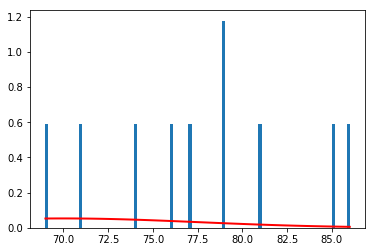

List of candidates:
	[0]71 [1]79 [2]81 [3]85 [4]86 [5]77 [6]69 [7]79 [8]74 [9]76 
Sample candidates from [0] to [3]
Best Sampling rejected candidate: [3]85
Hired candidate: [4]86
Global optimal candidates: [4]86 

In [6]:
test(10)

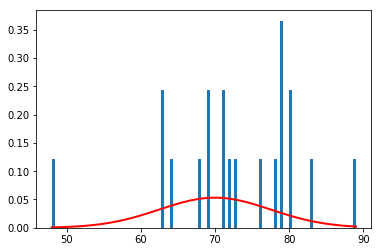

List of candidates:
	[0]69 [1]80 [2]71 [3]68 [4]83 [5]79 [6]69 [7]79 [8]78 [9]72 [10]80 [11]64 [12]73 [13]79 [14]48 [15]89 [16]71 [17]63 [18]63 [19]76 
Sample candidates from [0] to [6]
Best Sampling rejected candidate: [4]83
Hired candidate: [15]89
Global optimal candidates: [15]89 

In [7]:
test(20)

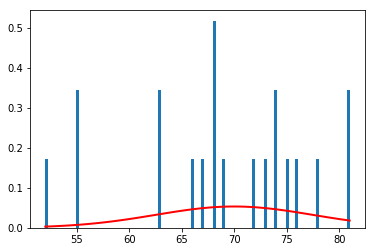

List of candidates:
	[0]63 [1]74 [2]75 [3]68 [4]81 [5]68 [6]72 [7]66 [8]55 [9]78 [10]73 [11]63 [12]67 [13]74 [14]81 [15]52 [16]55 [17]69 [18]68 [19]76 
Sample candidates from [0] to [6]
Best Sampling rejected candidate: [4]81
Hired candidate: [14]81
Global optimal candidates: [4]81 [14]81 

In [8]:
test(20)

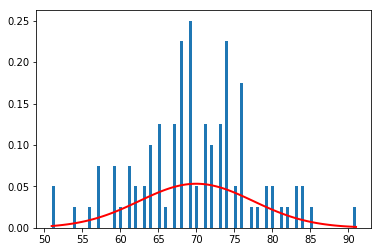

List of candidates:
	[0]69 [1]63 [2]64 [3]64 [4]57 [5]71 [6]54 [7]65 [8]71 [9]73 [10]68 [11]81 [12]51 [13]61 [14]65 [15]73 [16]75 [17]68 [18]84 [19]63 [20]76 [21]83 [22]67 [23]68 [24]59 [25]51 [26]74 [27]74 [28]56 [29]72 [30]76 [31]71 [32]64 [33]68 [34]74 [35]74 [36]82 [37]73 [38]65 [39]72 [40]74 [41]69 [42]91 [43]76 [44]85 [45]76 [46]64 [47]71 [48]80 [49]76 [50]61 [51]65 [52]69 [53]79 [54]68 [55]79 [56]83 [57]76 [58]72 [59]77 [60]73 [61]74 [62]57 [63]69 [64]62 [65]69 [66]74 [67]78 [68]68 [69]70 [70]71 [71]80 [72]84 [73]67 [74]65 [75]70 [76]69 [77]60 [78]67 [79]74 [80]66 [81]69 [82]62 [83]75 [84]67 [85]59 [86]68 [87]68 [88]73 [89]76 [90]74 [91]68 [92]61 [93]67 [94]57 [95]72 [96]69 [97]59 [98]69 [99]69 
Sample candidates from [0] to [36]
Best Sampling rejected candidate: [18]84
Hired candidate: [42]91
Global optimal candidates: [42]91 

In [9]:
test(100)

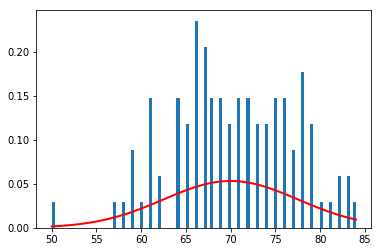

List of candidates:
	[0]67 [1]75 [2]79 [3]61 [4]59 [5]75 [6]67 [7]59 [8]66 [9]69 [10]78 [11]74 [12]65 [13]50 [14]66 [15]74 [16]60 [17]64 [18]79 [19]73 [20]64 [21]66 [22]72 [23]67 [24]66 [25]68 [26]82 [27]75 [28]72 [29]67 [30]66 [31]61 [32]67 [33]71 [34]69 [35]72 [36]69 [37]62 [38]76 [39]70 [40]66 [41]75 [42]76 [43]81 [44]78 [45]61 [46]67 [47]71 [48]70 [49]58 [50]64 [51]69 [52]57 [53]78 [54]70 [55]71 [56]73 [57]79 [58]71 [59]68 [60]64 [61]68 [62]78 [63]83 [64]72 [65]65 [66]83 [67]59 [68]77 [69]74 [70]68 [71]73 [72]75 [73]77 [74]67 [75]62 [76]78 [77]61 [78]64 [79]73 [80]79 [81]61 [82]74 [83]65 [84]80 [85]65 [86]82 [87]84 [88]71 [89]78 [90]76 [91]66 [92]66 [93]70 [94]76 [95]68 [96]76 [97]69 [98]77 [99]72 
Sample candidates from [0] to [36]
Best Sampling rejected candidate: [26]82
Hired candidate: [63]83
Global optimal candidates: [87]84 

In [10]:
test(100)

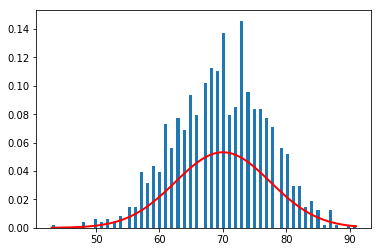

Sample candidates from [0] to [367]
Best Sampling rejected candidate: [249]90
Hired candidate: [799]91
Global optimal candidates: [799]91 

In [11]:
test(1000, False)

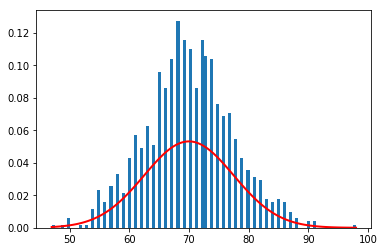

Sample candidates from [0] to [367]
Best Sampling rejected candidate: [307]98
Cant hire
Global optimal candidates: [307]98 

In [12]:
test(1000, False)

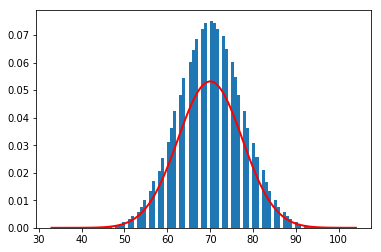

Sample candidates from [0] to [367878]
Best Sampling rejected candidate: [245827]103
Hired candidate: [380717]103
Global optimal candidates: [721740]104 [765323]104 

In [13]:
test(int(1e6), False)

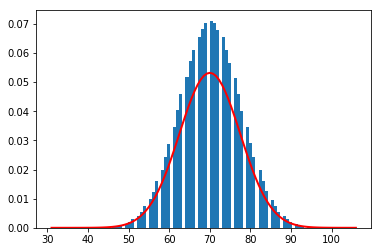

Sample candidates from [0] to [367878]
Best Sampling rejected candidate: [48858]104
Hired candidate: [465185]104
Global optimal candidates: [783665]106 

In [14]:
test(int(1e6), False)